# Dipole EMission on Substate

This is a simple implementation of dipole emission on substate.

In [1]:
import numpy as np
import datetime
from class_BFP_Image_QD import BFP_Image_QD
from scipy.optimize import curve_fit
import Fun_BFP_Image
import matplotlib.pyplot as plt

In [2]:
WL0 = 655e-9
nUp = 1
nDn = 1

indexsub=1.4564

p0 = np.array([0, 0, 1])

# To simulate the upper space
# -------------------------------------------------------------------------------------
# Initialize the coordinate for each layer
# The dipole should be better in the coordinate z=0
dl = np.zeros((nUp + nDn, 1))
dis = 17e-9

dl[1] = 100e-9
dl[0] = 0

# The position of the dipole
POSD = dl[nDn - 1] + dis


# Initialize the permitivity
Eplist = np.zeros((nUp + nDn + 1, 1), dtype=complex)


Eplist[2] = 1
Eplist[1] = 1
Eplist[0] = indexsub**2

DonSub = BFP_Image_QD(Eplist, dl, nUp, nDn, p0, WL0, POSD)

num_kx = 200
num_ky = 200

NA=indexsub
# first interpolate to krho kphi
num_krho = num_kx
num_kphi = num_ky
krho = np.linspace(0 + 1e-5, 1 + 1e-5, num_kx) * DonSub.k0 * NA
kphi = np.linspace(0, 2*np.pi, num_kphi)
krho_grid, kphi_grid = np.meshgrid(krho, kphi)
kx_grid = krho_grid*np.cos(kphi_grid)
ky_grid = krho_grid*np.sin(kphi_grid)

2021-06-30 14:06:26:The Basic Parameters Have Been Initialized!!!


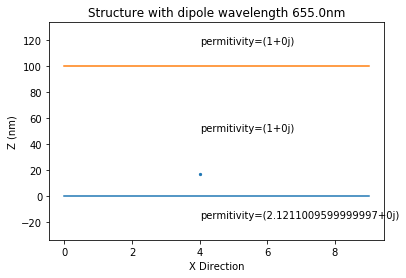

In [3]:
DonSub.Show_Structure()

In [4]:
# Initialize the Green Function
DonSub.Cal_Green_List(kx_grid, ky_grid)

2021-06-30 14:07:41: The Green Function Has Been Prepared


0

In [5]:
px=np.array([1.0, 0, 0])
py=np.array([0, 1.0, 0])
pz=np.array([0, 0, 1.0])

PatternUpDx,PatternDnDx = DonSub.Cal_Pattern_List_QD_p1(px)
PatternUpDy,PatternDnDy = DonSub.Cal_Pattern_List_QD_p1(py)
PatternUpDz,PatternDnDz = DonSub.Cal_Pattern_List_QD_p1(pz)

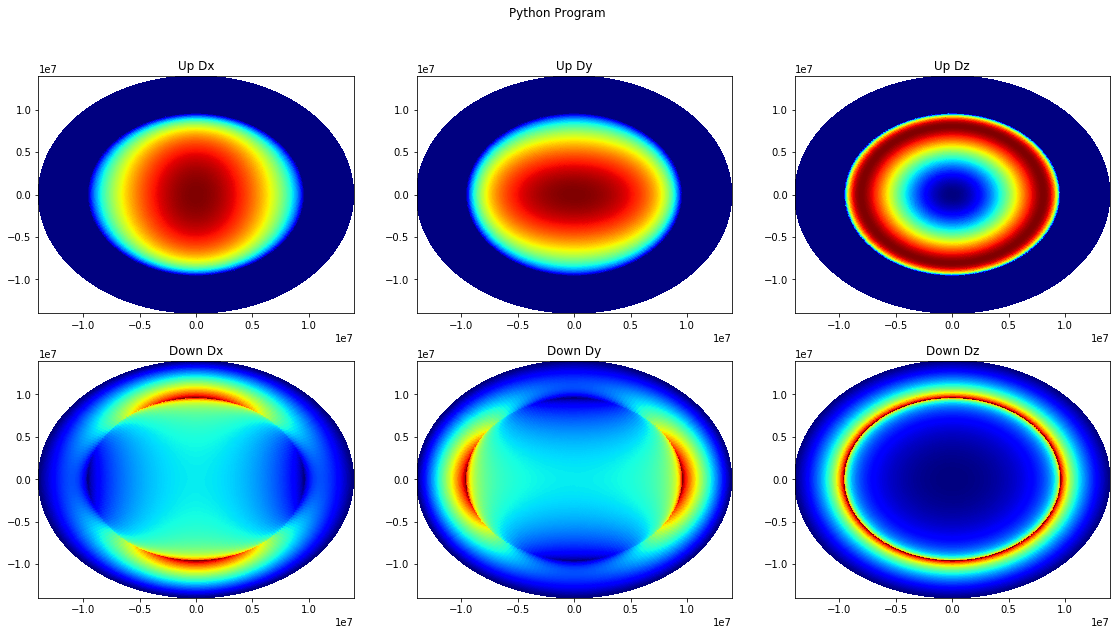

In [7]:
fig1 = plt.figure(figsize=(6.4*3,4.8*2))
plt.subplot(231)
plt.pcolormesh(kx_grid,ky_grid,PatternUpDx, cmap='jet')
plt.title('Up Dx')
plt.subplot(232)
plt.pcolormesh(kx_grid,ky_grid,PatternUpDy, cmap='jet')
plt.title('Up Dy')
plt.subplot(233)
plt.pcolormesh(kx_grid,ky_grid,PatternUpDz, cmap='jet')
plt.title('Up Dz')
plt.subplot(234)
plt.pcolormesh(kx_grid,ky_grid,PatternDnDx, cmap='jet')
plt.title('Down Dx')
plt.subplot(235)
plt.pcolormesh(kx_grid,ky_grid,PatternDnDy, cmap='jet')
plt.title('Down Dy')
plt.subplot(236)
plt.pcolormesh(kx_grid,ky_grid,PatternDnDz, cmap='jet')
plt.title('Down Dz')
plt.suptitle('Python Program')
plt.savefig('./Figures/PatternfordipoleoindexsubPython.png')
plt.show()